# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import re  # for searching common words in a string
import os

ModuleNotFoundError: No module named 'wordcloud'

# Installing vader sentiment analyser

In [ ]:
!pip install vaderSentiment


# Importing Vader sentiment analyzer


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Importing Dataset

In [ ]:
df = pd.read_csv ('IPL_2022_tweets.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22784\2560482354.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('IPL_2022_tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


# Analysing the dataset

In [ ]:
df.shape

(574664, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574664 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         574664 non-null  object 
 1   user_location     384107 non-null  object 
 2   user_description  492538 non-null  object 
 3   user_created      574655 non-null  object 
 4   user_followers    574649 non-null  float64
 5   user_friends      574649 non-null  object 
 6   user_favourites   574649 non-null  object 
 7   user_verified     574649 non-null  object 
 8   date              574649 non-null  object 
 9   text              574649 non-null  object 
 10  hashtags          574620 non-null  object 
 11  source            574640 non-null  object 
 12  is_retweet        574640 non-null  object 
dtypes: float64(1), object(12)
memory usage: 57.0+ MB


In [ ]:
df.isnull().sum()

user_name                0
user_location       190557
user_description     82126
user_created             9
user_followers          15
user_friends            15
user_favourites         15
user_verified           15
date                    15
text                    15
hashtags                44
source                  24
is_retweet              24
dtype: int64

# Copying text to perform EDA

In [ ]:
df['senttext'] = df['text']

# Conterting all string data to lowercase

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())

<AxesSubplot:>

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


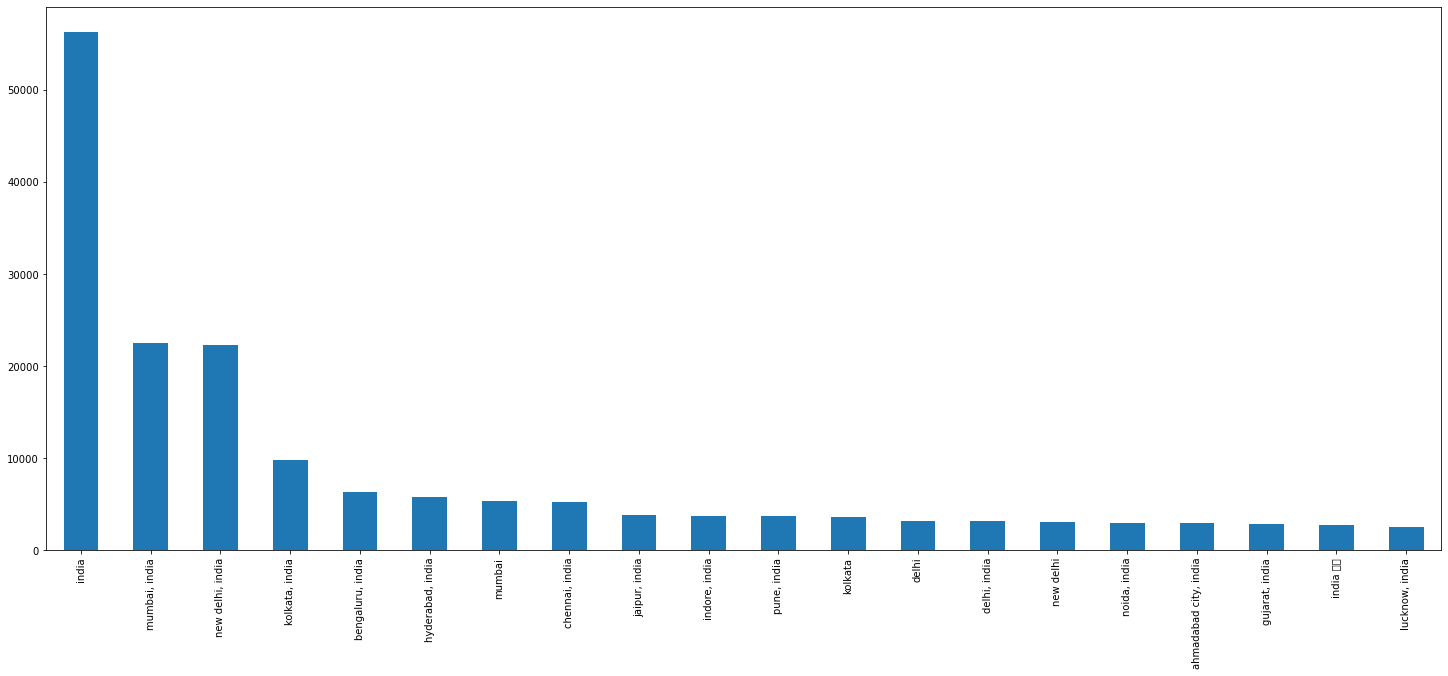

In [ ]:
loc_df = df[df.user_location != 'nan']
loc_df.user_location.value_counts().nlargest(20).plot(kind='bar',figsize=(25,10))

<function matplotlib.pyplot.show(close=None, block=None)>

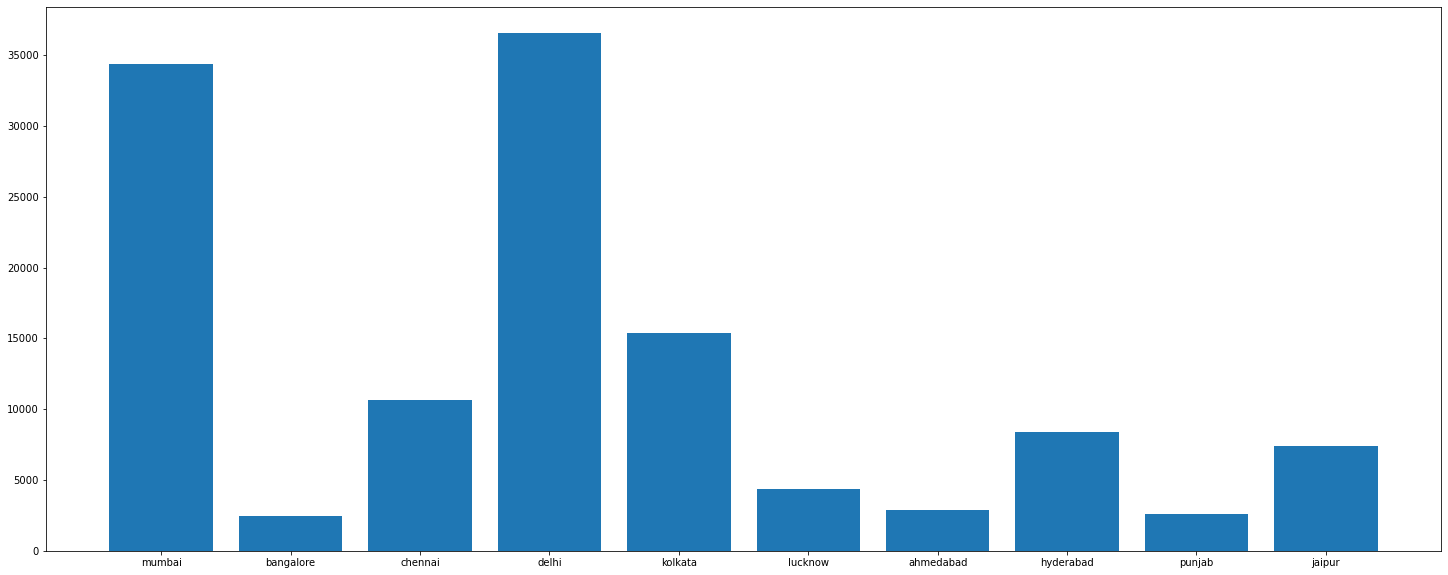

In [ ]:
indian_cities = {}
indian_ipl_cities = ['mumbai','bangalore','chennai','delhi','kolkata','lucknow','ahmedabad','hyderabad','punjab','jaipur']
for city in indian_ipl_cities:
    indian_cities[city] = df.user_location.str.count(city).sum()
    
plt.figure(figsize=(25,10))
plt.bar(*zip(*indian_cities.items()))
plt.show

Checking if the user account is verified or not

<AxesSubplot:>

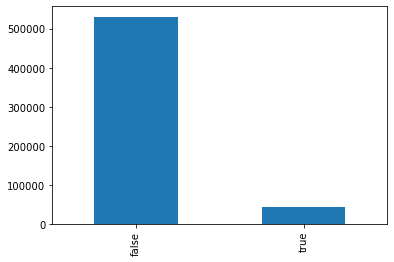

In [ ]:
df.user_verified.value_counts().nlargest(2).plot(kind='bar')

This shows that most of the users are not verified

# Checking most commonly using hastags

<AxesSubplot:>

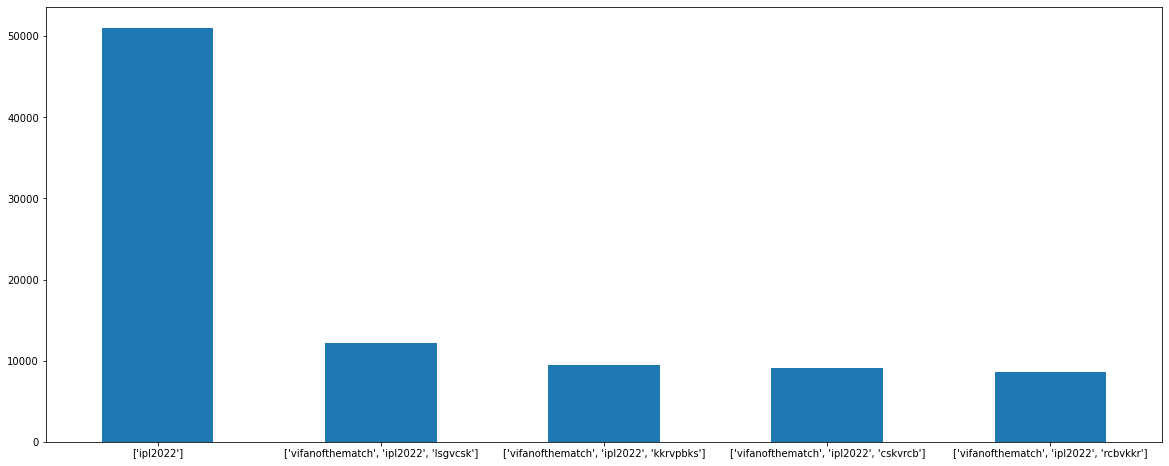

In [ ]:
hashtag_df = df[df.hashtags != 'nan']
hashtag_df.hashtags.value_counts().nlargest(5).plot(kind='bar', rot=0, figsize=(20,8))

#ipl2022 is most commonly used hashtag

In [ ]:
import nltk
nltk.download('stopwords')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  Preprocessing the data

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df.text = df.text.apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))

In [ ]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=\_\'\*\"|(|)]", " ", x).split()))

In [ ]:
df.text = df.text.apply(lambda x: ' '.join(re.sub(r'http\S+', '',x).split()))

In [ ]:
df.text.head()

0    👉world cricket baba 👈 top countries 🏆 best cri...
1    fans reacted two new ipl teams gujarat titans ...
2    👉world cricket baba 👈 top countries 🏆 best cri...
3                               h wow 3 ducks 3 chicks
4    👉world cricket baba 👈 top countries 🏆 best cri...
Name: text, dtype: object

Data is cleaned except emojis

# Creating a wordcloud

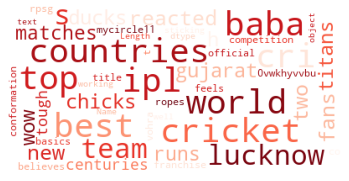

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          colormap='Reds',
                          max_words=200,
                          max_font_size=40, 
                          random_state=49
                         ).generate(str(df['text']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Replacing the emojis

In [ ]:
try:
    # UCS-4
    e = re.compile(u'[\U00010000-\U0010ffff]')
except re.error:
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
emojis = []
for x in df.text:
    match  = e.search(x)
    if match:
        emojis.append(match.group())

In [ ]:
dfe =  pd.DataFrame(emojis,columns=['text'])
pd.Series(' '.join(dfe['text']).lower().split()).value_counts()[:10]

🔥    12132
🏏    10334
👉     6741
𓃵     6147
😍     5583
😂     4358
💛     4206
👏     3941
🏆     3237
𓃬     3094
dtype: int64

# Finding similar words using word2vec

In [ ]:
num_features = 400    # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

wt = [list(x.split()) for x in df.text]
from gensim.models import word2vec
print ("Training model...")
wv_model = word2vec.Word2Vec(wt, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

wv_model.init_sims(replace=True)

Training model...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22784\3546914480.py:14: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv_model.init_sims(replace=True)


In [ ]:
wv_model.wv.most_similar("ipl") 


[('ipl2022', 0.45069894194602966),
 ('interestingly', 0.4284207224845886),
 ('registered', 0.40067049860954285),
 ('creates', 0.38967469334602356),
 ('become', 0.37855225801467896),
 ('confirmed', 0.37611812353134155),
 ('edition', 0.37492138147354126),
 ('icc', 0.37490081787109375),
 ('season', 0.37394237518310547),
 ('stat', 0.37317168712615967)]

In [ ]:
wv_model.wv.most_similar("dhoni") 


[('dhoni’s', 0.8232691287994385),
 ('msd', 0.6501485705375671),
 ('dhoni🔥', 0.5992487668991089),
 ('dharamshala', 0.4801568388938904),
 ('becuz', 0.4535444378852844),
 ('whosoever', 0.4243617057800293),
 ('characteristics', 0.422791063785553),
 ('jaddu', 0.4092290699481964),
 ('thala', 0.4061024487018585),
 ('mahi', 0.4032473564147949)]

In [ ]:
wv_model.wv.most_similar("captain") 


[('captaincy', 0.7064322233200073),
 ('captaining', 0.6067964434623718),
 ('skipper', 0.5968765020370483),
 ('leader', 0.5787372589111328),
 ('leadership', 0.5774898529052734),
 ('captains', 0.5572407245635986),
 ('lead', 0.5567924976348877),
 ('versa', 0.5195139646530151),
 ('captainship', 0.48884057998657227),
 ('captained', 0.4811829924583435)]

# Now applying VADER sentiment analyser

In [ ]:
analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['senttext'].apply(lambda x: analyser.polarity_scores(str(x)))

In [ ]:
def sentiment_func(sentiment):
    for k,v in sentiment.items():
        if (k== 'pos' or k or 'neg' or k == 'neu') == True:
            if (sentiment['pos'] > 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] < 0.5) == True:
                return 'positive'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] > 0.5 and sentiment['neu'] < 0.5) == True:
                return 'negative'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] > 0.5) == True:
                return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(sentiment_func)

<AxesSubplot:>

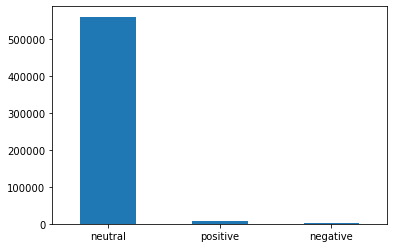

In [ ]:
df.sentiment.value_counts().plot(kind='bar', rot=0)

In [ ]:
df.sentiment.value_counts()

neutral     561264
positive      7146
negative      1324
Name: sentiment, dtype: int64

Most the tweets are neutral. This can be due to most tweets just containing score updates or match updates.

Number of positive tweets are more than negative. Seems like people were very happy with tournament happening at such difficult time and people got excited and happy to see their favorite cricketers back on pitch.

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [ ]:
val = input("Enter your value: ")

Enter your value: happy


In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser2 = SentimentIntensityAnalyzer()
sentiment = analyser2.polarity_scores(val)
sentiment

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}